# AIT 580 - Assignment 9

John Gullette, Rebecca Conn, Karyna Todd

### 2.1.1 Import libraries

In [37]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from textblob.classifiers import NaiveBayesClassifier
import numpy as np
from sklearn.model_selection import train_test_split

### 2.1.2 Load one text file: pos_tweets.txt.

In [38]:
fo = open("pos_tweets.txt", 'r', encoding = 'utf-8')
mytext = fo.read()

### 2.1.3 Tokenize sentences. Print # of the sentences and list 5 sentences.

In [39]:
sentences = sent_tokenize(mytext.lower())
print('# of sentences: ', len(sentences))
sentences[:5]

# of sentences:  738


['" i cheer myself up when i\'m down by listening to my playlist called, genius: ballads and cellos.',
 'i love my ipod and my taste of music."',
 '" just watched the movie wanted... it was pretty darn good."',
 '" now i\'m happy "\n"--plotting like i\'m mike..\'game plan:pass the ball to lebron at all times and dont foul\'..certainly we\'ll win  haha..go cavs goooo!"',
 '"@ mcdonalds with my litto sis aka cuzin lol cristyyyyy "\n"@ pbnjen : thanks for the great tour and making me even more excited to work in pr!']

### 2.1.4 Tokenize words and remove punctuations. Print # of the words and list 50 words only.

In [40]:
tokenizer = nltk.RegexpTokenizer('\w+')
words = tokenizer.tokenize(mytext.lower())
print('# of words: ', len(words))
words[:50]

# of words:  8869


['i',
 'cheer',
 'myself',
 'up',
 'when',
 'i',
 'm',
 'down',
 'by',
 'listening',
 'to',
 'my',
 'playlist',
 'called',
 'genius',
 'ballads',
 'and',
 'cellos',
 'i',
 'love',
 'my',
 'ipod',
 'and',
 'my',
 'taste',
 'of',
 'music',
 'just',
 'watched',
 'the',
 'movie',
 'wanted',
 'it',
 'was',
 'pretty',
 'darn',
 'good',
 'now',
 'i',
 'm',
 'happy',
 'plotting',
 'like',
 'i',
 'm',
 'mike',
 'game',
 'plan',
 'pass',
 'the']

### 2.1.5 Remove stop words. Print the # of stop words and list 50 stop words.

In [41]:
sw = stopwords.words('english')
words = [word for word in words if word.lower() not in sw]
print('# of words without stop words: ', len(words))
words[:50]

# of words without stop words:  5209


['cheer',
 'listening',
 'playlist',
 'called',
 'genius',
 'ballads',
 'cellos',
 'love',
 'ipod',
 'taste',
 'music',
 'watched',
 'movie',
 'wanted',
 'pretty',
 'darn',
 'good',
 'happy',
 'plotting',
 'like',
 'mike',
 'game',
 'plan',
 'pass',
 'ball',
 'lebron',
 'times',
 'dont',
 'foul',
 'certainly',
 'win',
 'haha',
 'go',
 'cavs',
 'goooo',
 'mcdonalds',
 'litto',
 'sis',
 'aka',
 'cuzin',
 'lol',
 'cristyyyyy',
 'pbnjen',
 'thanks',
 'great',
 'tour',
 'making',
 'even',
 'excited',
 'work']

### 2.1.6 Calculate the word count or frequency.

In [42]:
freq_dist = nltk.FreqDist(words)
freq_dist

FreqDist({'love': 67, 'good': 58, 'day': 47, 'lakers': 44, 'taylor': 41, 'swift': 40, 'new': 38, 'go': 35, 'see': 34, 'great': 33, ...})

### 2.1.7 Draw a plot of frequency distribution and print out the list of the top 20 pairs of the word and frequency.

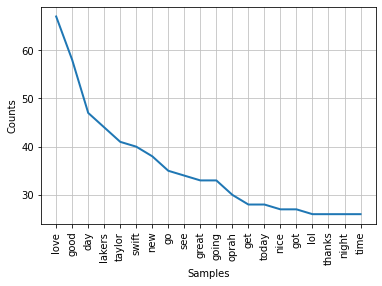

[('love', 67),
 ('good', 58),
 ('day', 47),
 ('lakers', 44),
 ('taylor', 41),
 ('swift', 40),
 ('new', 38),
 ('go', 35),
 ('see', 34),
 ('great', 33),
 ('going', 33),
 ('oprah', 30),
 ('get', 28),
 ('today', 28),
 ('nice', 27),
 ('got', 27),
 ('lol', 26),
 ('thanks', 26),
 ('night', 26),
 ('time', 26)]

In [43]:
freq_dist.plot(20)
freq_dist.most_common(20)

### 2.1.8 Observe above outputs and plots. What can you find? Please explain.

From the above outputs and plots, we find that the words "love" and "good" are far out the most used descriptors in the positive tweets. Additionally, the subject of the tweets is often about the Lakers (the Los Angeles basketball team, I presume), Taylor Swift, and Oprah. 

## 2.2 Text Classification 

### 2.2.1 Load two data files: neg_tweets.txt and pos_tweets.txt.

In [44]:
neg_fo = open('neg_tweets.txt', 'r', encoding = 'utf-8')
negtext = neg_fo.read()

#Tokenize the negative tweets into sentences
neg_sentences = sent_tokenize(negtext.lower())

#Rename senteneces to pos_sentences to distinguish between the positive and negative text files
pos_sentences = sentences

#Place the two datasets into a lists of tuples marking each sentence either neg or pos
pos_data = []
neg_data = []

for sentence in pos_sentences:
    s = (sentence, 'pos')
    pos_data.append(s)
        
for sentence in neg_sentences:
    t = (sentence, 'neg')
    neg_data.append(t)


### 2.2.2 Split the data into a training set and a test set.

In [45]:
#Split the positive and negative data sets into a training and test set
pos_data = np.array(pos_data)
neg_data = np.array(neg_data)
pos_train, pos_test = train_test_split(pos_data, test_size = 0.2)
neg_train, neg_test = train_test_split(neg_data, test_size = 0.2)

#Combine the training and test sets so the final sets have both positive and negative tweets
#Used information from https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html
all_train = np.concatenate((pos_train, neg_train), axis = 0)
all_test = np.concatenate((pos_test, neg_test), axis = 0)


### 2.2.3.1 Use TextBlob NB classifier to classify the sentiments, show the accuracy and most informative features.

In [46]:
#Classify and show accuracy
classifier = NaiveBayesClassifier(all_train)
print("Accuracy: {0}".format(classifier.accuracy(all_test)))

#Show most informative features
classifier.show_informative_features(10)

Accuracy: 0.7587064676616916
Most Informative Features
      contains(headache) = True              neg : pos    =     21.1 : 1.0
            contains(no) = True              neg : pos    =     17.3 : 1.0
          contains(been) = True              neg : pos    =     12.6 : 1.0
          contains(lost) = True              neg : pos    =     11.8 : 1.0
       contains(awesome) = True              pos : neg    =     11.3 : 1.0
          contains(damn) = True              neg : pos    =     10.7 : 1.0
          contains(sick) = True              neg : pos    =     10.7 : 1.0
         contains(thank) = True              pos : neg    =      9.7 : 1.0
         contains(sorry) = True              neg : pos    =      9.5 : 1.0
     contains(beautiful) = True              pos : neg    =      7.4 : 1.0


### 2.2.2.2 Observe the above outputs. Explain your findings.

In the above output, we find that based upon a training set of 80%, the classifier has an accuracy of just around 77%. This is for determining if a sentence has positive sentiment or negative sentiment. Likewise, the classifier uses the above 10 words as the strongest terms to determine the sentiment. The words "headache", "awesome", and "no" are significantly stronger than any other word in classification. 